In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving fashion-mnist_test.csv to fashion-mnist_test.csv
Saving fashion-mnist_train.csv to fashion-mnist_train.csv
User uploaded file "fashion-mnist_test.csv" with length 22176691 bytes
User uploaded file "fashion-mnist_train.csv" with length 133047193 bytes


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
train_df = pd.read_csv('fashion-mnist_train.csv')
test_df = pd.read_csv('fashion-mnist_test.csv')

In [4]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [6]:
train_df.shape

(60000, 785)

In [0]:
training = np.array(train_df, dtype = 'float32')

In [0]:
test = np.array(test_df, dtype = 'float32')

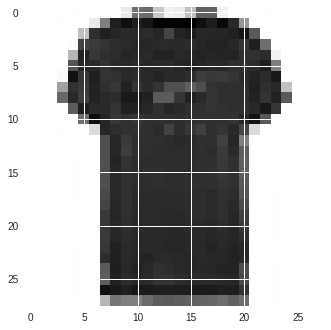

In [9]:
plt.imshow(training[10, 1:].reshape(28,28))

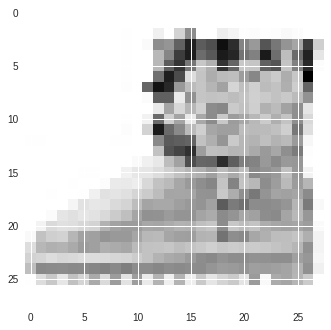

In [10]:
plt.imshow(training[12, 1:].reshape(28,28))

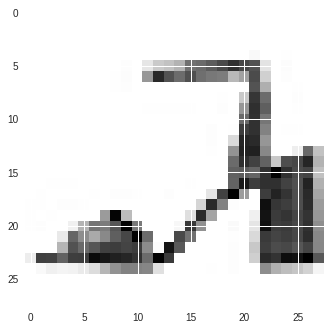

In [11]:
plt.imshow(training[60, 1:].reshape(28,28))

25077

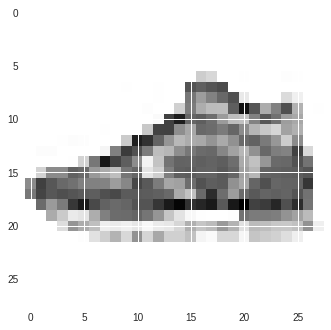

In [12]:
import random
i = random.randint(1, 60000)
plt.imshow(training[i, 1:].reshape(28,28))
label = training[i,0]
label #try for 8
i

Remember the 10 classes decoding is as follows:

0 => T-shirt/top

1 => Trouser

2 => Pullover

3 => Dress

4 => Coat

5 => Sandal

6 => Shirt

7 => Sneaker

8 => Bag

9 => Ankle boot


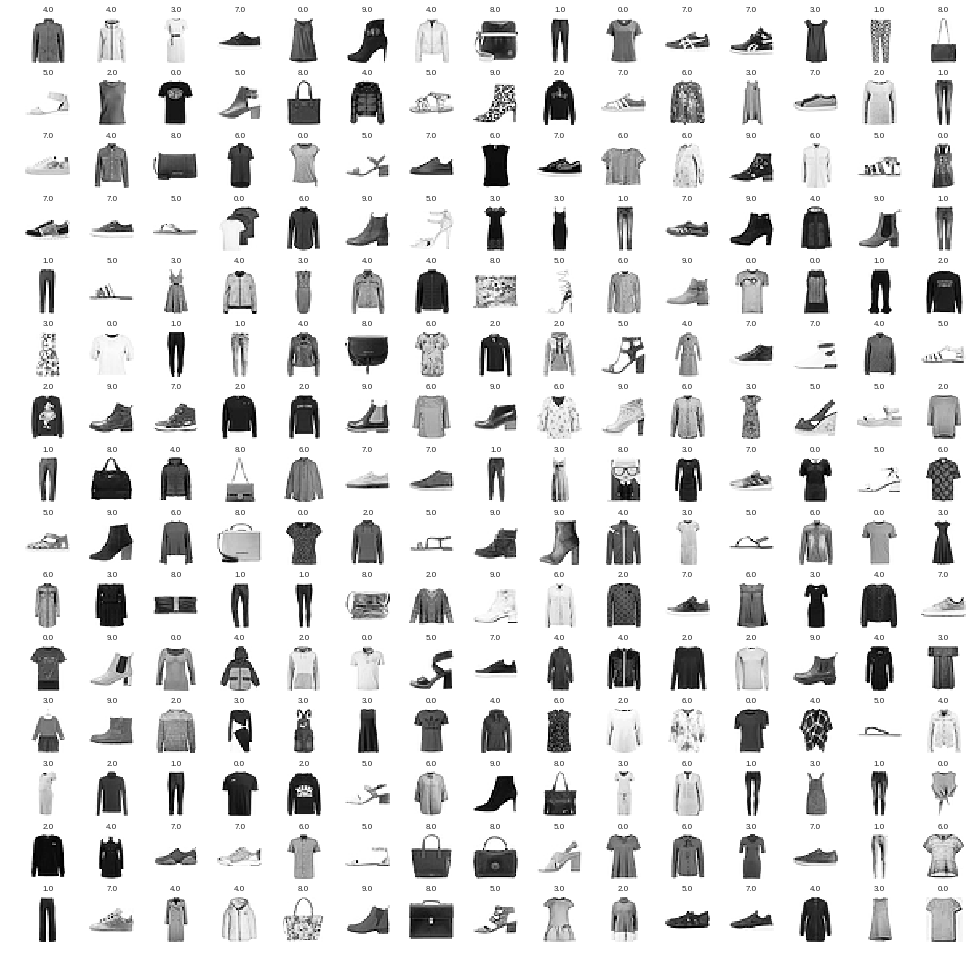

In [13]:
W_grid = 15
L_grid = 15
fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))
axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(training)

for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    index = np.random.randint(0, n_training)
    axes[i].imshow( training[index,1:].reshape((28,28)) )
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)


In [0]:
x_train = training[:, 1:]/255
y_train = training[:, 0]

In [0]:
x_test = test[:, 1:]/255
y_test = test[:, 0]

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.2, random_state = 12345)

In [0]:
x_train = x_train.reshape(x_train.shape[0], *(28,28,1))
x_test = x_test.reshape(x_test.shape[0], *(28,28,1))
x_validate = x_validate.reshape(x_validate.shape[0], *(28,28,1))

In [19]:
x_train.shape

(48000, 28, 28, 1)

In [20]:
x_test.shape

(10000, 28, 28, 1)

In [21]:
x_validate.shape

(12000, 28, 28, 1)

In [22]:
import keras

Using TensorFlow backend.


In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [0]:
cnn_model = Sequential()

In [25]:
cnn_model.add(Conv2D(32, 3, 3, input_shape = (28,28,1), activation = 'relu'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  """Entry point for launching an IPython kernel.


In [0]:
cnn_model.add(MaxPooling2D(pool_size = (2,2)))

In [0]:
cnn_model.add(Flatten())

In [28]:
cnn_model.add(Dense(output_dim = 32, activation = 'relu'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  """Entry point for launching an IPython kernel.


In [29]:
cnn_model.add(Dense(output_dim = 10, activation = 'sigmoid'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  """Entry point for launching an IPython kernel.


In [0]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(lr = 0.001), metrics = ['accuracy'])

In [0]:
epochs = 50

In [32]:
cnn_model.fit(x_train,
             y_train,
             batch_size = 512,
             nb_epoch = epochs,
             verbose=1,
             validation_data = (x_validate, y_validate))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 5s 104us/step - loss: 0.8664 - acc: 0.7198 - val_loss: 0.5086 - val_acc: 0.8215
Epoch 2/50
48000/48000 [==============================] - 1s 27us/step - loss: 0.4639 - acc: 0.8383 - val_loss: 0.4203 - val_acc: 0.8557
Epoch 3/50
48000/48000 [==============================] - 1s 27us/step - loss: 0.4093 - acc: 0.8573 - val_loss: 0.3886 - val_acc: 0.8653
Epoch 4/50
48000/48000 [==============================] - 1s 27us/step - loss: 0.3831 - acc: 0.8664 - val_loss: 0.3786 - val_acc: 0.8699
Epoch 5/50
48000/48000 [==============================] - 1s 27us/step - loss: 0.3568 - acc: 0.8765 - val_loss: 0.3486 - val_acc: 0.8804
Epoch 6/50
48000/48000 [==============================] - 1s 27us/step - loss: 0.3372 - acc: 0.8828 - val_loss: 0.3463 - val_acc: 0.8783
Epoch 7/50
48000/48000 [==============================] - 1s 27us/step - loss: 0.3256 - acc: 0.8866 - val_loss: 0.3267 - val_ac

In [33]:
evaluation = cnn_model.evaluate(x_test, y_test)
print('Test accuracy : {:.3f}'.format(evaluation[1]))

10000/10000 [==============================] - 1s 64us/step
Test accuracy : 0.914


In [0]:
predicted_classes = cnn_model.predict_classes(x_test)

In [37]:
predicted_classes

array([0, 1, 2, ..., 8, 8, 1])

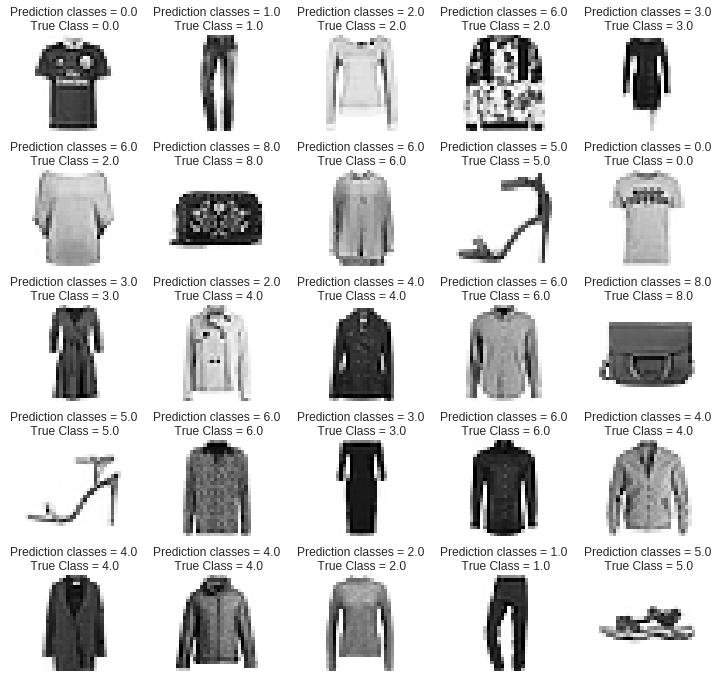

In [40]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L*W):
  axes[i].imshow(x_test[i].reshape(28,28))
  axes[i].set_title("Prediction classes = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
  axes[i].axis('off')
  
plt.subplots_adjust(wspace = 0.5)

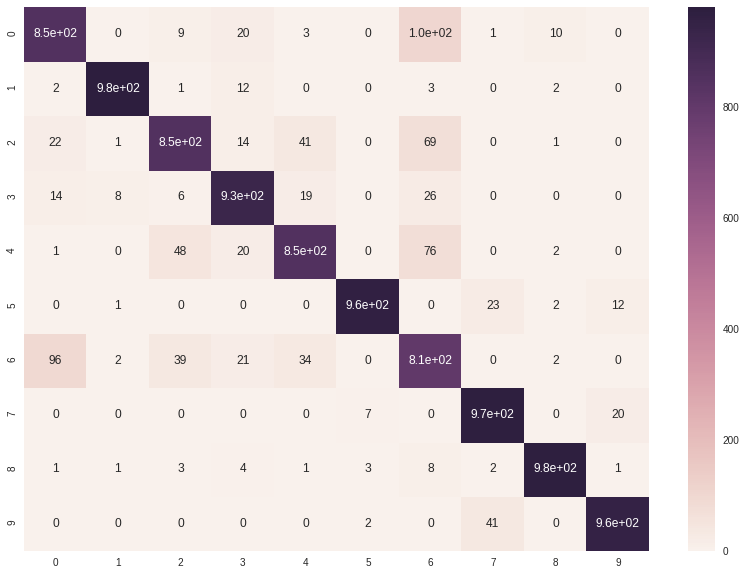

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot = True)

In [42]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.86      0.85      0.86      1000
     Class 1       0.99      0.98      0.98      1000
     Class 2       0.89      0.85      0.87      1000
     Class 3       0.91      0.93      0.92      1000
     Class 4       0.90      0.85      0.87      1000
     Class 5       0.99      0.96      0.97      1000
     Class 6       0.74      0.81      0.77      1000
     Class 7       0.94      0.97      0.95      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.97      0.96      0.96      1000

   micro avg       0.91      0.91      0.91     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000



In [43]:
#Improvement over previous one (with 64 feature detector or kernel and dropout)
cnn_model2 = Sequential()

# Try 32 fliters first then 64
cnn_model2.add(Conv2D(64,3, 3, input_shape = (28,28,1), activation='relu'))
cnn_model2.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model2.add(Dropout(0.25))

# cnn_model.add(Conv2D(32,3, 3, activation='relu'))
# cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model2.add(Flatten())
cnn_model2.add(Dense(output_dim = 32, activation = 'relu'))
cnn_model2.add(Dense(output_dim = 10, activation = 'sigmoid'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  


In [0]:
cnn_model2.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(lr = 0.001), metrics = ['accuracy'])
epochs = 50

In [45]:
cnn_model2.fit(x_train,
             y_train,
             batch_size = 512,
             nb_epoch = epochs,
             verbose=1,
             validation_data = (x_validate, y_validate))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 3s 61us/step - loss: 0.8701 - acc: 0.6984 - val_loss: 0.5012 - val_acc: 0.8148
Epoch 2/50
48000/48000 [==============================] - 2s 52us/step - loss: 0.4494 - acc: 0.8395 - val_loss: 0.4227 - val_acc: 0.8509
Epoch 3/50
48000/48000 [==============================] - 2s 51us/step - loss: 0.3955 - acc: 0.8617 - val_loss: 0.3711 - val_acc: 0.8703
Epoch 4/50
48000/48000 [==============================] - 2s 51us/step - loss: 0.3661 - acc: 0.8715 - val_loss: 0.3487 - val_acc: 0.8764
Epoch 5/50
48000/48000 [==============================] - 2s 51us/step - loss: 0.3421 - acc: 0.8804 - val_loss: 0.3274 - val_acc: 0.8857
Epoch 6/50
48000/48000 [==============================] - 2s 52us/step - loss: 0.3239 - acc: 0.8867 - val_loss: 0.3218 - val_acc: 0.8857
Epoch 7/50
48000/48000 [==============================] - 2s 51us/step - loss: 0.3091 - acc: 0.8915 - val_loss: 0.3018 - val_acc

In [47]:
evaluation = cnn_model2.evaluate(x_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

10000/10000 [==============================] - 1s 75us/step
Test Accuracy : 0.917


In [48]:
# get the predictions for the test data
predicted_classes2 = cnn_model2.predict_classes(x_test)

from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes2, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.82      0.90      0.86      1000
     Class 1       0.99      0.98      0.98      1000
     Class 2       0.86      0.87      0.87      1000
     Class 3       0.91      0.94      0.92      1000
     Class 4       0.88      0.89      0.88      1000
     Class 5       0.99      0.97      0.98      1000
     Class 6       0.83      0.70      0.76      1000
     Class 7       0.96      0.97      0.96      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.97      0.97      0.97      1000

   micro avg       0.92      0.92      0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

